## Titanic Project

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
Titanic = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [94]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
Titanic.shape

(891, 12)

Our Data set has 891 rows and 12 columns, Where our target variable is Survived and all others are the independent variables.

In [96]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:
    
1) It can be seen that there is difference between count of Age column and all other columns is different. Which means data is not proper.

2) For column age all other attributes seems not to be normal, hence we will have to check this in details.

3) For column Sibsp the difference between the 75 percentile and maximum value is high which suggests the skewness and outliers in it.

4) In the same way there is huge difference of 75 percentile and maximum value in columns parch and fare which suggests outliers and skewness in them as well.

In [97]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1) From above information it can be observed that there are many values in age columns which are null.

2) Other columns having Null values are Cabin and Embarked.

3) The Column Cabin is having high no. of values in null and as per the observation it wont effect the prediction of survived people.

4) There are 3 types of data in the set, where 2 are having float values, 5 are integer and 5 are object.

5) Will be dropping the 3 below mentioned columns from the data, the reason for dropping them is also given along.


1st Column to be Dropped - Name - 

We will be dropping the name column as the prediction of the survived is to be done unbaised and in any ways the name of the passenger wont affect the chances of survival.


2nd Column to be Dropped - Ticket -

In the same way as Name the ticket no. wont help in predicting the surviver hence we will be dropping it.


3rd Column to be Dropped - Cabin -

With Around 600 null values in the column it will affect the column negatively and also having a cabin or not wont be usefull in predicting the surviver.


Also we will be making the Passenger grid as our index column as it is just giving the no. of passenger.

In [98]:
Titanic.set_index('PassengerId', inplace = True)

In [99]:
titanic2 = pd.DataFrame(Titanic)

In [100]:
titanic2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [101]:
titanic2.drop(columns =['Name','Ticket','Cabin'], inplace = True)

In [102]:
titanic2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


Checking the Nan Values and filling them.

In [103]:
titanic2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

So it can be seen that there are 177 null values in column 'Age' and 2 null values in Column 'Embarked'. Rest of the columns are not having any null values.

In [104]:
mean_age = titanic2['Age'].mean()

In [105]:
mean_age

29.69911764705882

In [106]:
titanic2['Age'].fillna(mean_age, inplace = True)

In [107]:
titanic2['Age'].isnull().sum()

0

In [108]:
mode_embarked = titanic2['Embarked'].mode()[0]

In [109]:
mode_embarked

'S'

In [110]:
titanic2['Embarked'].fillna(mode_embarked, inplace = True)

In [111]:
titanic2['Embarked'].isnull().sum()

0

In [112]:
titanic2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We have filled all the Nan values in the data set so now we will go ahead with graphical analysis and checking skewness.

In [113]:
titanic2.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_9952\2524958174.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic2.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [114]:
titanic2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here in survived column 0 is not survived and 1 is survived. There is difference between the 0 and 1, we will check it through graph as well.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

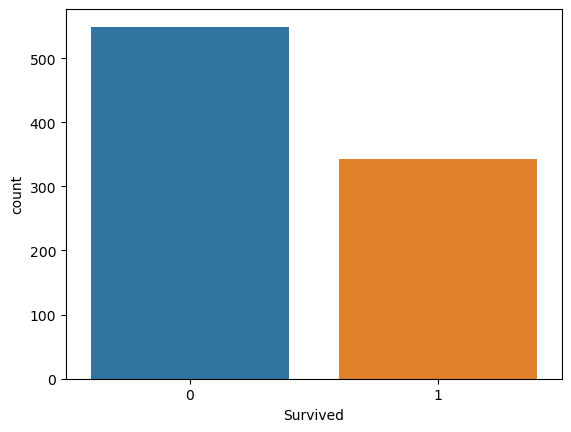

In [115]:
sns.countplot(titanic2['Survived'])

In [116]:
titanic2['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

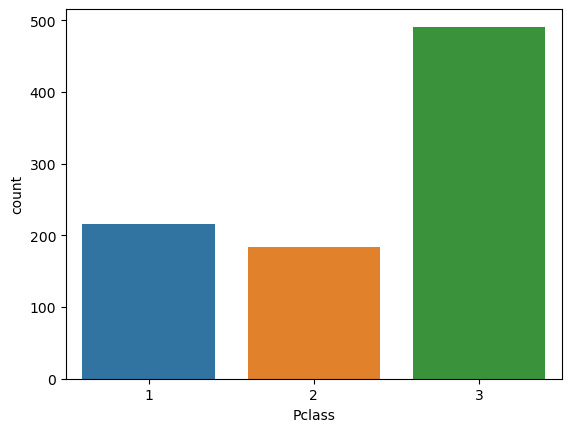

In [117]:
sns.countplot(titanic2['Pclass'])

Here, also we can se that the value count for the class is having difference.

In [118]:
titanic2['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

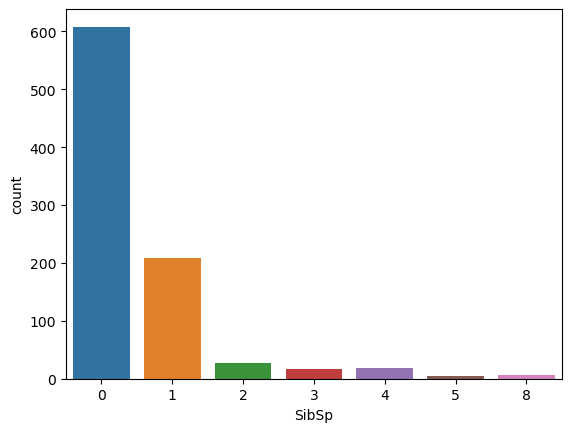

In [119]:
sns.countplot(titanic2['SibSp'])

The differnce is the values is also high in this column as well.

In [120]:
titanic2['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

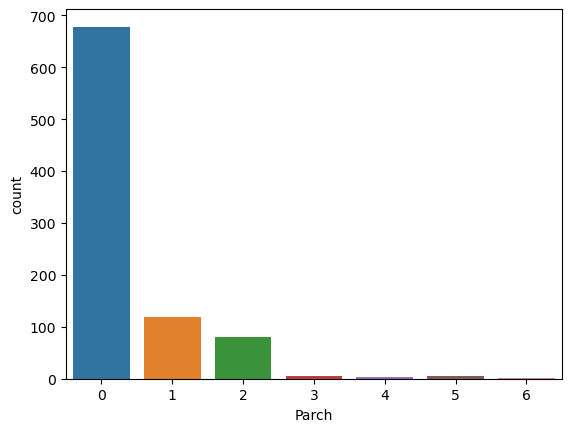

In [121]:
sns.countplot(titanic2['Parch'])

The differnce is the values is also high in this column as well.

In [122]:
titanic2['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

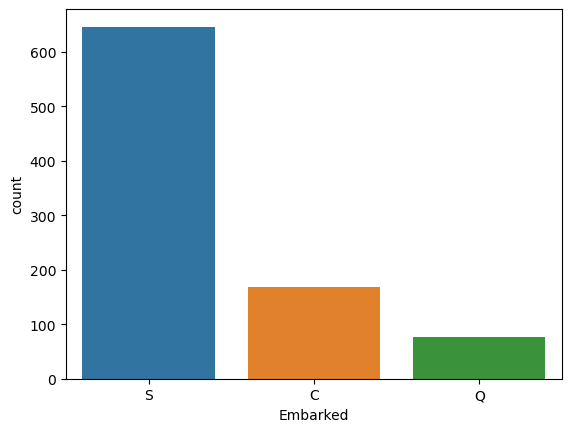

In [123]:
sns.countplot(titanic2['Embarked'])

Difference between values can be seen in Embarked (boarding) as well.

So before resampling the data we will have to convert the string values in float format through encoding.

In [124]:
from sklearn.preprocessing import OrdinalEncoder

In [125]:
oe = OrdinalEncoder()

for i in titanic2.columns:
    if titanic2[i].dtypes == 'object':
        titanic2[i] = oe.fit_transform(titanic2[i].values.reshape(-1,1))

In [126]:
titanic2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1.0,22.000000,1,0,7.2500,2.0
2,1,1,0.0,38.000000,1,0,71.2833,0.0
3,1,3,0.0,26.000000,0,0,7.9250,2.0
4,1,1,0.0,35.000000,1,0,53.1000,2.0
5,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
887,0,2,1.0,27.000000,0,0,13.0000,2.0
888,1,1,0.0,19.000000,0,0,30.0000,2.0
889,0,3,0.0,29.699118,1,2,23.4500,2.0


We will resample the data.

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
sm = SMOTE(random_state = 42)

In [129]:
titanic2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [130]:
x = titanic2.drop('Survived', axis = 1)
y = titanic2['Survived']

In [131]:
x_resam, y_resam = sm.fit_resample(x,y)

In [132]:
titanic_resam = pd.DataFrame(x_resam, columns = x.columns)

In [133]:
titanic_resam['Survived'] = y_resam

In [134]:
titanic_resam

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1.000000,22.000000,1,0,7.250000,2.0000,0
1,1,0.000000,38.000000,1,0,71.283300,0.0000,1
2,3,0.000000,26.000000,0,0,7.925000,2.0000,1
3,1,0.000000,35.000000,1,0,53.100000,2.0000,1
4,3,1.000000,35.000000,0,0,8.050000,2.0000,0
...,...,...,...,...,...,...,...,...
1093,1,0.554354,52.336938,0,1,24.967957,2.0000,1
1094,1,0.611721,25.835162,0,0,73.844596,0.0000,1
1095,3,0.000000,31.614950,2,0,15.703140,1.5804,1
1096,2,0.247731,28.420924,0,0,13.000000,2.0000,1


So we have resampled the data so that the differnce between the values could be less and hence the size of data has alos increased.

In [135]:
print('The size of data before Re-sampling was', titanic2.shape)
print('The size of data after Re-sampling is', titanic_resam.shape)

The size of data before Re-sampling was (891, 8)
The size of data after Re-sampling is (1098, 8)


Now we will be checking the skewness of data again, try to remove in columns if possible.

In [136]:
titanic_resam.skew()

Pclass     -0.432340
Sex        -0.356741
Age         0.326519
SibSp       3.847458
Parch       2.771951
Fare        4.502664
Embarked   -1.203978
Survived    0.000000
dtype: float64

Except Fare all the other columns are categorical hence we should remove skewness in them. We will be try removing skewness from column Fare.

In [137]:
titanic_resam['Fare'].value_counts()

13.000000    49
8.050000     43
7.750000     40
7.895800     38
26.000000    34
             ..
5.000000      1
9.845800      1
10.516700     1
21.964264     1
32.425994     1
Name: Fare, Length: 420, dtype: int64

<AxesSubplot:ylabel='Frequency'>

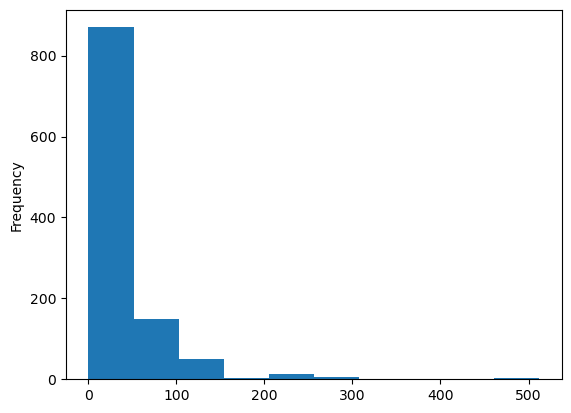

In [138]:
titanic_resam['Fare'].plot.hist()

In [139]:
titanic_resam ['Fare'] = np.log1p(titanic_resam['Fare'])

In [140]:
titanic_resam ['Fare'].skew()

0.36535765306163803

<AxesSubplot:ylabel='Frequency'>

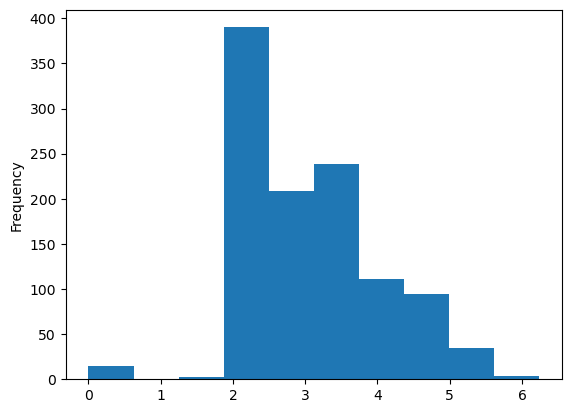

In [141]:
titanic_resam ['Fare'].plot.hist()

In [142]:
titanic_resam.skew()

Pclass     -0.432340
Sex        -0.356741
Age         0.326519
SibSp       3.847458
Parch       2.771951
Fare        0.365358
Embarked   -1.203978
Survived    0.000000
dtype: float64

As we have removed skewness, now we will go ahead and check the correlation of columns with our target variable 'Survived'.

<AxesSubplot:>

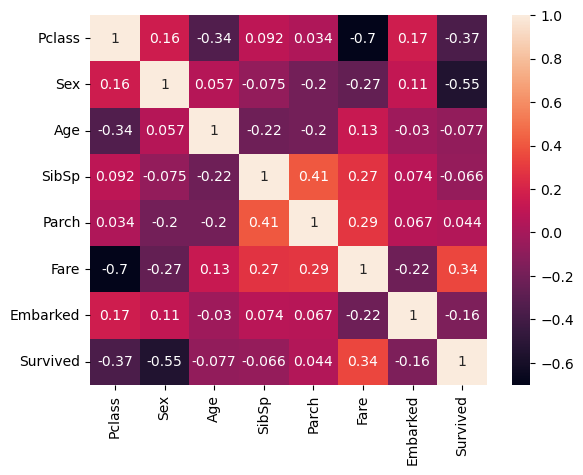

In [143]:
sns.heatmap(titanic_resam.corr(), annot = True)

Observations:
    
1) So through the above heatmap it can be seen that 2 columns Sex and Pclass are having negative correlation with Survived.

We will be checking for outliers in the data and removing them.

In [144]:
from scipy.stats import zscore

In [145]:
Z = np.abs(zscore(titanic_resam))
Z

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.915971,0.859564,0.556999,0.499682,0.475969,0.957822,0.614319,1.0
1,1.425674,1.223689,0.648284,0.499682,0.475969,1.263474,1.936518,1.0
2,0.915971,1.223689,0.255678,0.473103,0.475969,0.877334,0.614319,1.0
3,1.425674,1.223689,0.422293,0.499682,0.475969,0.966917,0.614319,1.0
4,0.915971,0.859564,0.422293,0.473103,0.475969,0.863099,0.614319,1.0
...,...,...,...,...,...,...,...,...
1093,1.425674,0.068829,1.728287,0.473103,0.833841,0.215728,0.614319,1.0
1094,1.425674,0.050680,0.268095,0.473103,0.475969,1.299112,1.936518,1.0
1095,0.915971,1.223689,0.167297,1.472467,0.475969,0.235891,0.079153,1.0
1096,0.254851,0.707602,0.073309,0.473103,0.475969,0.416572,0.614319,1.0


In [146]:
threshold = 3
print(np.where(Z>3))

(array([  13,   16,   25,   50,   59,   68,   71,   86,   96,  116,  119,
        159,  164,  167,  171,  179,  180,  182,  201,  233,  258,  261,
        263,  266,  271,  277,  278,  302,  324,  360,  386,  413,  437,
        438,  466,  480,  481,  493,  541,  542,  567,  597,  610,  630,
        633,  638,  672,  674,  678,  679,  683,  686,  732,  736,  737,
        745,  774,  787,  792,  806,  813,  815,  822,  824,  846,  850,
        851,  858,  863,  885,  990, 1067], dtype=int64), array([4, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 3, 5, 3, 3, 3, 3, 5, 3,
       5, 3, 5, 5, 3, 5, 3, 4, 3, 5, 4, 4, 5, 3, 5, 2, 3, 3, 4, 5, 4, 2,
       5, 4, 2, 5, 4, 5, 3, 3, 5, 4, 5, 2, 4, 3, 3, 5, 3, 5, 5, 3, 3, 3,
       2, 4, 3, 4, 3, 5], dtype=int64))


In [147]:
titanic = titanic_resam[(Z<3).all(axis =1)]
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1.000000,22.000000,1,0,2.110213,2.0000,0
1,1,0.000000,38.000000,1,0,4.280593,0.0000,1
2,3,0.000000,26.000000,0,0,2.188856,2.0000,1
3,1,0.000000,35.000000,1,0,3.990834,2.0000,1
4,3,1.000000,35.000000,0,0,2.202765,2.0000,0
...,...,...,...,...,...,...,...,...
1093,1,0.554354,52.336938,0,1,3.256863,2.0000,1
1094,1,0.611721,25.835162,0,0,4.315414,0.0000,1
1095,3,0.000000,31.614950,2,0,2.815597,1.5804,1
1096,2,0.247731,28.420924,0,0,2.639057,2.0000,1


Checking the Outliers through Box plot.

<AxesSubplot:>

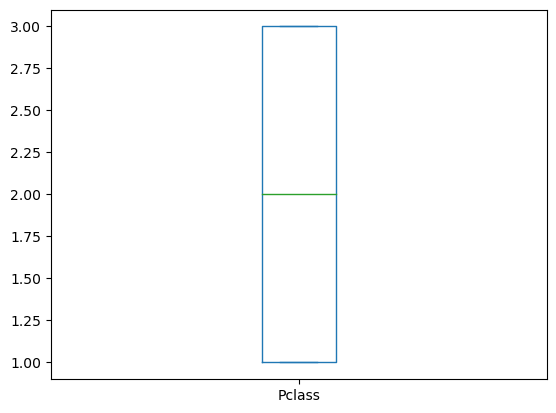

In [148]:
titanic['Pclass'].plot.box()

<AxesSubplot:>

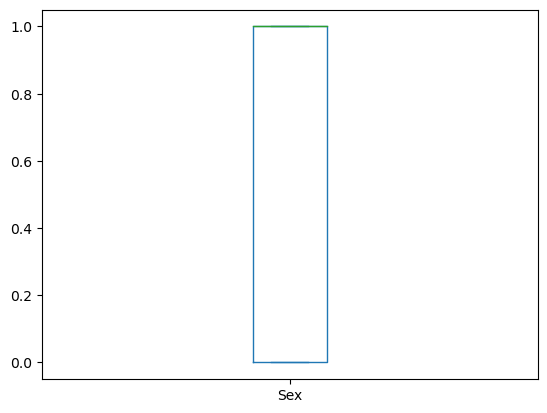

In [149]:
titanic['Sex'].plot.box()

<AxesSubplot:>

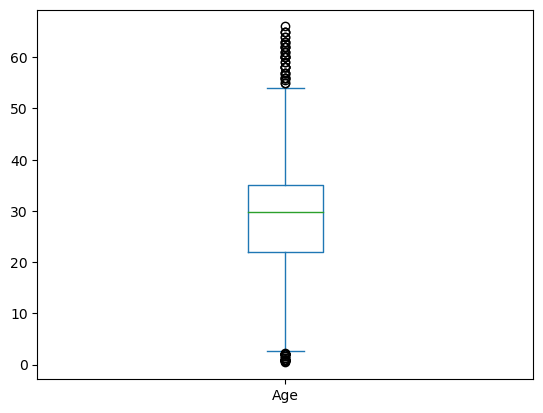

In [150]:
titanic['Age'].plot.box()

Even after removing outliers and having the skewness in normall range the column age is still having the outliers.

<AxesSubplot:ylabel='Frequency'>

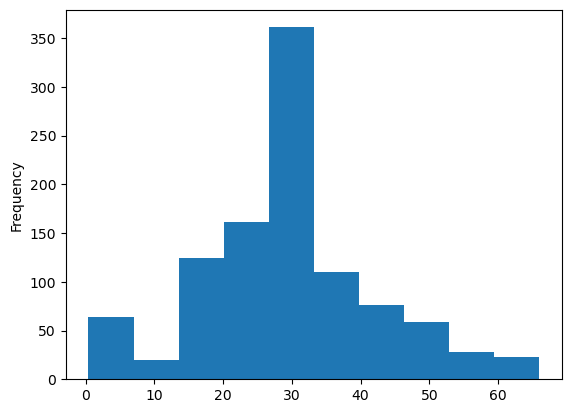

In [151]:
titanic['Age'].plot.hist()

<AxesSubplot:>

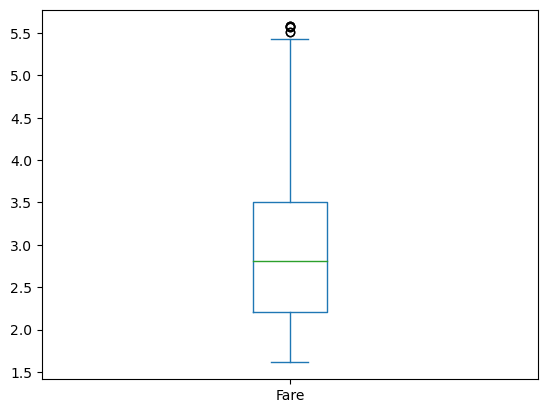

In [152]:
titanic['Fare'].plot.box()

There are outliers present in this column but in less numbers.

Hence now we will go ahead and check the variance inflation factor and to do that we will first separate the independent variables and target variable.

In [153]:
x1 = titanic.iloc[:,:-1]
y1 = titanic.iloc[:,-1]

In [154]:
x1.shape

(1026, 7)

In [155]:
y1.shape

(1026,)

We will be scaling the data so the the biasedness in the data can be removed.

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x2 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
x2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.937411,0.873174,-0.585667,1.034840,-0.478522,-1.041684,0.626335
1,-1.402695,-1.207248,0.679541,1.034840,-0.478522,1.362840,-1.899371
2,0.937411,-1.207248,-0.269365,-0.569006,-0.478522,-0.954557,0.626335
3,-1.402695,-1.207248,0.442314,1.034840,-0.478522,1.041821,0.626335
4,0.937411,0.873174,0.442314,-0.569006,-0.478522,-0.939148,0.626335
...,...,...,...,...,...,...,...
1021,-1.402695,-0.053957,1.813241,-0.569006,1.262483,0.228669,0.626335
1022,-1.402695,0.065390,-0.282400,-0.569006,-0.478522,1.401417,-1.899371
1023,0.937411,-1.207248,0.174640,2.638686,-0.478522,-0.260203,0.096442
1024,-0.232642,-0.691863,-0.077929,-0.569006,-0.478522,-0.455787,0.626335


As we have scaled the independent variables using standard scaler now we will check for variance inflation factor.

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vari = variance_inflation_factor
vif = pd.DataFrame()

vif['Values'] = [vari(x2.values,i) for i in range (len(x2.columns))]
vif['Features'] = x2.columns

In [158]:
vif

,Values,Features
0,3.972421,Pclass
1,1.116335,Sex
2,1.274966,Age
3,1.315889,SibSp
4,1.361665,Parch
5,4.577062,Fare
6,1.076738,Embarked


The Variance inflation factor does not seems high hence we will not be dropping any of the columns for the data set.

searching for best random state

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
maxacc = 0
bestrs = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x2,y1, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxacc:
        maxacc = acc
        bestrs = i
        
print('The Best accuracy is', maxacc, 'at the random state', bestrs)

The Best accuracy is 0.8603896103896104 at the random state 70


In [162]:
x_train,x_test,y_train,y_test = train_test_split(x2,y1, test_size = 0.30, random_state = bestrs)

Importing Classification Models

In [163]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [164]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
lgpred = lg.predict(x_test)
lgacc = accuracy_score(y_test,lgpred)
lgcon = confusion_matrix(y_test,lgpred)
lgclass = classification_report(y_test,lgpred)

print('The accuracy score for Logistic Regression is', lgacc.round(2))
print(lgcon)
print(lgclass)

The accuracy score for Logistic Regression is 0.86
[[130  21]
 [ 22 135]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       151
           1       0.87      0.86      0.86       157

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [165]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
rfcacc = accuracy_score(y_test,rfcpred)
rfccon = confusion_matrix(y_test,rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print('The accuracy score for Random Forest Classifier is', rfcacc.round(2))
print(rfccon)
print(rfcclass)

The accuracy score for Random Forest Classifier is 0.85
[[128  23]
 [ 23 134]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       151
           1       0.85      0.85      0.85       157

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [166]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
etcpred = etc.predict(x_test)
etcacc = accuracy_score(y_test, etcpred)
etccon = confusion_matrix(y_test, etcpred)
etcclass = classification_report(y_test, etcpred)

print('The accuracy score for Extra tress classifier is', etcacc.round(2))
print(etccon)
print(etcclass)

The accuracy score for Extra tress classifier is 0.84
[[125  26]
 [ 22 135]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       151
           1       0.84      0.86      0.85       157

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



In [169]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcacc = accuracy_score(y_test, svcpred)
svccon = confusion_matrix(y_test, svcpred)
svcclass = classification_report(y_test, svcpred)

print('The accuracy score for Support vector classifier is', svcacc.round(2))
print(svccon)
print(svcclass)

The accuracy score for Support vector classifier is 0.86
[[133  18]
 [ 26 131]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       151
           1       0.88      0.83      0.86       157

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [170]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbcpred = gbc.predict(x_test)
gbcacc = accuracy_score(y_test, gbcpred)
gbccon = confusion_matrix(y_test, gbcpred)
gbcclass = classification_report(y_test, gbcpred)

print('The accuracy score for Gradient Boosting Classifier is', gbcacc.round(2))
print(gbccon)
print(gbcclass)

The accuracy score for Gradient Boosting Classifier is 0.85
[[134  17]
 [ 29 128]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       151
           1       0.88      0.82      0.85       157

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [171]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
abcpred = abc.predict(x_test)
abcacc = accuracy_score(y_test, abcpred)
abccon = confusion_matrix(y_test, abcpred)
abcclass = classification_report(y_test, abcpred)

print('The accuracy socre for Ada boost classifier is', abcacc.round(2))
print(abccon)
print(abcclass)

The accuracy socre for Ada boost classifier is 0.86
[[132  19]
 [ 23 134]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       151
           1       0.88      0.85      0.86       157

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [184]:
bc = BaggingClassifier()
bc.fit(x_train, y_train)
bcpred = bc.predict(x_test)
bcacc = accuracy_score(y_test, bcpred)
bccon = confusion_matrix(y_test, bcpred)
bcclass = classification_report(y_test, bcpred)

print('The accuracy score for Bagging classifier is', bcacc.round(2))
print(bccon)
print(bcclass)

The accuracy score for Bagging classifier is 0.82
[[123  28]
 [ 26 131]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.82      0.83      0.83       157

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



So it looks like all of the models are fitting nearly similarly on the data set, hence we will go ahead and check the cross val score.

In [191]:
score = cross_val_score(lg,x2,y1)
print(score)
print(score.mean())
print(lgacc)
print('The difference between the accuracy and cross val score of Logistic Regression is',lgacc - score.mean())

[0.77669903 0.8        0.76585366 0.84878049 0.83902439]
0.8060715131423158
0.8603896103896104
The difference between the accuracy and cross val score of Logistic Regression is 0.05431809724729453


In [192]:
score1 = cross_val_score(rfc,x2,y1)
print(score1)
print(score1.mean())
print(rfcacc)
print('The difference between the accuracy and cross val score of Random Forest Classifier is ', rfcacc - score1.mean())

[0.7815534  0.8195122  0.82439024 0.86829268 0.91219512]
0.8411887283921382
0.8506493506493507
The difference between the accuracy and cross val score of Random Forest Classifier is  0.009460622257212448


In [193]:
score2 = cross_val_score(etc,x2,y1)
print(score2)
print(score2.mean())
print(etcacc)
print('The difference between the accuracy and cross val score of Extra trees classifier is',etcacc - score2.mean())

[0.76213592 0.80487805 0.81463415 0.85365854 0.89756098]
0.826573525929434
0.8441558441558441
The difference between the accuracy and cross val score of Extra trees classifier is 0.0175823182264101


In [194]:
score3 = cross_val_score(svc,x2,y1)
print(score3)
print(score3.mean())
print(svcacc)
print('The difference between the accuracy and cross val score of Support vector classifier is', svcacc - score3.mean())

[0.7815534  0.79512195 0.78536585 0.87317073 0.84878049]
0.8167984844896992
0.8571428571428571
The difference between the accuracy and cross val score of Support vector classifier is 0.040344372653157934


In [195]:
score4 = cross_val_score(gbc,x2,y1)
print(score4)
print(score4.mean())
print(gbcacc)
print('The difference between the accuracy and cross val score of Gradient boost classifier is', gbcacc - score4.mean())

[0.7961165  0.8097561  0.8        0.89756098 0.91219512]
0.8431257399952641
0.8506493506493507
The difference between the accuracy and cross val score of Gradient boost classifier is 0.007523610654086577


In [196]:
score5 = cross_val_score(abc,x2,y1)
print(score5)
print(score5.mean())
print(abcacc)
print('The difference between the accuracy and cross val score of Ada boost classifier is', abcacc - score5.mean())

[0.74271845 0.7902439  0.78536585 0.88780488 0.89268293]
0.8197632015155103
0.8636363636363636
The difference between the accuracy and cross val score of Ada boost classifier is 0.04387316212085335


In [197]:
score6 = cross_val_score(bc,x2,y1)
print(score6)
print(score6.mean())
print(bcacc)
print('The difference between the accuracy and cross val score of Bagging classifier is', bcacc - score6.mean())

[0.75728155 0.8097561  0.8097561  0.88292683 0.86829268]
0.8256026521430263
0.8246753246753247
The difference between the accuracy and cross val score of Bagging classifier is -0.000927327467701633


In [201]:
print('The Accuracy for Gradient Boosting Classifier is')
print(gbcacc.round(2)*100,'%')

The Accuracy for Gradient Boosting Classifier is
85.0 %


So after applying Cross Validation score to every model it can be seen there is not much difference between accuracy score and the mean of cross val score. Hence we will go ahead with Gradient Boost Classifier having high accuracy and less difference in cross val score.

In [198]:
from sklearn.model_selection import GridSearchCV

In [202]:
param = {'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [203]:
gcv = GridSearchCV(GradientBoostingClassifier(), param, cv =5)

In [204]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [210]:
fmodel = GradientBoostingClassifier(learning_rate = 0.01,max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50 )
fmodel.fit(x_train, y_train)
fpred = fmodel.predict(x_test)
facc = accuracy_score(y_test, fpred)

print('The Accuracy score for Final model is', facc.round(2)*100,'%')

The Accuracy score for Final model is 86.0 %


The Final Model is giving the the accuracy of 86% hence we will now save it.

In [211]:
import joblib

In [212]:
joblib.dump(fmodel,'Titanic Data')

['Titanic Data']

In [213]:
m = joblib.load('Titanic Data')

In [214]:
predic = m.predict(x_test)
predic

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [215]:
A = np.array(y_test)

In [216]:
df = pd.DataFrame()
df['Predicted'] = predic
df['Original'] = A
df

,Predicted,Original
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
303,0,0
304,1,1
305,0,0
306,0,0
